# Lecture 21

## Scaling/Shifting

In the beginning of Lab 4 you are asked to take random numbers between 0 and 1 and scale and shift them to be between $x_{min}$ and $x_{max}$. The formula is pretty basic. If $x_0$ is between 0 and 1 then $x$ computed as:
$$
x= (x_{max}-x_{min}) x_0 + x_{min}
$$
will be between $x_{min}$ and $x_{max}$. 

In your solution, you'll most likely generate $x_0$ one by one, compute $x$, and store $x$ into a list to be returned from your function.


## Mean/Variance

Also for lab 4, remember the equations for mean/variance. If you have a data sample ${x_1, x_2, ..., x_N}$ the mean is:

$$ 
\bar{x} = \frac{1}{N}\sum_{i=1}^{N} x_i
$$

and the variance is:

$$
<x^2> = \frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x})^2
$$


## Min, Max, ArgMin, ArgMax

Consider a list of random numbers:

In [1]:
import random
data = [random.random() for _ in range(100)]

In [2]:
data

[0.21723683881409195,
 0.0670991424314723,
 0.914186488812305,
 0.9445863021644646,
 0.6818740424604169,
 0.6129536937909612,
 0.9032427843266493,
 0.2558024273622389,
 0.8065675242411681,
 0.7547310653198942,
 0.7342808094738889,
 0.1716936826559976,
 0.6498899470322511,
 0.3062209549251499,
 0.24155523203196216,
 0.9439208468968872,
 0.2087403403615823,
 0.80705632116499,
 0.29819195828831335,
 0.3093924208419008,
 0.26034042676515823,
 0.17865363545794066,
 0.2841332950188923,
 0.624193835364229,
 0.28263521139064773,
 0.1985816458256342,
 0.23526013545279767,
 0.007837405539553366,
 0.34927092792412395,
 0.33336650888293573,
 0.14079776105998754,
 0.06718785861541543,
 0.2748477229337154,
 0.034490553529174406,
 0.2829943271005888,
 0.6740000560824038,
 0.8206234551705781,
 0.8218978264643183,
 0.03938938323227292,
 0.07381010707444946,
 0.8008374057222877,
 0.8592454450934952,
 0.3945016326226476,
 0.9552117254881151,
 0.9143961159109877,
 0.3035320273338854,
 0.41045935544352885,

You find the largest and smallest numbers in the list:

In [3]:
max(data),min(data)

(0.9985927275427727, 0.007837405539553366)

It is convenient that `max` and `min` are available in python, but let's think about how we would implement one of these functions:

In [4]:
def find_max(d):
    a_max=d[0]
    for e in d:
        if e>a_max:
            a_max=e
    return a_max

In [5]:
find_max(data)

0.9985927275427727

While `max` gives us the largest value, we may instead be interested to know which element in the list is the largest (i.e. what is the index of the largest value)... this is where `argmax` comes in:

In [6]:
def find_argmax(d):
    a_max=d[0]
    i_max=0
    for i,e in enumerate(d):
        if e>a_max:
            a_max=e
            i_max=i
    return i_max

In [7]:
find_argmax(data)

64

## Numerical Manipulation of Mathematical Functions 

Recall that we can easily make a list of sequential intergers using `range`.

In [8]:
list(range(5,20,3))

[5, 8, 11, 14, 17]

What if we wanted to do something similar but with non-intergers, for example in step size of 1/2:

In [9]:
list(range(5.,20.,.5))

TypeError: 'float' object cannot be interpreted as an integer

Let's implement what we need:

In [10]:
def arange(x_min,x_max,step_size=1.):
    if step_size >= 0 and x_max<x_min:
        return list()
    
    if step_size < 0 and x_max>x_min:
        return list()
    
    x=x_min
    out = list()
    while x<x_max:
        out.append(x)
        x+=step_size
    return out

In [48]:
arange(5.,20.,.5)

[5.0,
 5.5,
 6.0,
 6.5,
 7.0,
 7.5,
 8.0,
 8.5,
 9.0,
 9.5,
 10.0,
 10.5,
 11.0,
 11.5,
 12.0,
 12.5,
 13.0,
 13.5,
 14.0,
 14.5,
 15.0,
 15.5,
 16.0,
 16.5,
 17.0,
 17.5,
 18.0,
 18.5,
 19.0,
 19.5]

An alternative similar function is:

In [12]:
def linspace(x_min,x_max,steps=10):
    step_size=(x_max-x_min)/steps
    x=x_min
    out = list()
    for i in range(steps):
        out.append(x)
        x+=step_size
    return out

In [14]:
linspace(5.,20.,20)

[5.0,
 5.75,
 6.5,
 7.25,
 8.0,
 8.75,
 9.5,
 10.25,
 11.0,
 11.75,
 12.5,
 13.25,
 14.0,
 14.75,
 15.5,
 16.25,
 17.0,
 17.75,
 18.5,
 19.25]

Now lets use what we wrote to investigate a mathematical function:

In [15]:
def a_function(x):
    return (1+x)**2

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
x_vals = arange(-5.,5.,0.1)

3 ways to do the same thing:

In [ ]:
y_vals = [a_function(x) for x in x_vals]

In [21]:
y_vals = list(map(a_function,x_vals))

In [22]:
y_vals = list()
for x in x_vals:
    y_vals.append(a_function(x))

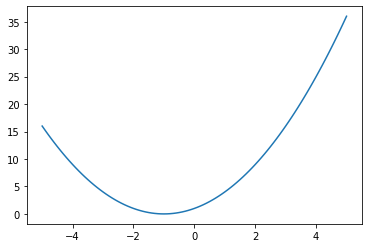

In [23]:
plt.plot(x_vals,y_vals)

In [25]:
list(zip(x_vals,y_vals))

[(-5.0, 16.0),
 (-4.9, 15.210000000000003),
 (-4.800000000000001, 14.440000000000005),
 (-4.700000000000001, 13.690000000000008),
 (-4.600000000000001, 12.96000000000001),
 (-4.500000000000002, 12.250000000000012),
 (-4.400000000000002, 11.560000000000015),
 (-4.3000000000000025, 10.890000000000017),
 (-4.200000000000003, 10.240000000000018),
 (-4.100000000000003, 9.610000000000019),
 (-4.0000000000000036, 9.000000000000021),
 (-3.9000000000000035, 8.41000000000002),
 (-3.8000000000000034, 7.8400000000000185),
 (-3.7000000000000033, 7.290000000000018),
 (-3.600000000000003, 6.760000000000017),
 (-3.500000000000003, 6.250000000000015),
 (-3.400000000000003, 5.760000000000015),
 (-3.300000000000003, 5.290000000000013),
 (-3.200000000000003, 4.840000000000012),
 (-3.1000000000000028, 4.410000000000012),
 (-3.0000000000000027, 4.000000000000011),
 (-2.9000000000000026, 3.6100000000000096),
 (-2.8000000000000025, 3.240000000000009),
 (-2.7000000000000024, 2.890000000000008),
 (-2.6000000000

In [26]:
def find_min(f,x_min,x_max,steps=10):
    step_size=(x_max-x_min)/steps
    x=x_min
    y_min=f(x_min)
    x_min_val=x_min

    for i in range(steps):
        y=f(x)
        if y<y_min:
            x_min_val=x
            y_min=y
        x+=step_size
    
    return x_min_val

In [28]:
find_min(a_function,-10,10,100)

-1.000000000000002

In [29]:
find_min(lambda x: (1+x)**2,-10.,10.,100)

-1.000000000000002

## Histogram

In Lab 4 you are asked to write a histogram function:

* User inputs a list of values `x` and optionally `n_bins` which defaults to 10.
* If not supplied, find the minimum and maximum (`x_min`,`x_max`) of the values in x.
* Determine the bin size (`bin_size`) by dividing the range of the function by the number of bins.
* Create an empty list of zeros of size `n_bins`, call it `hist`.
* Loop over the values in `x`
    * Loop over the values in `hist` with index `i`:
        * If x is between `x_min+i*bin_size` and `x_min+(i+1)*bin_size`, increment `hist[i].` 
        * For efficiency, try to use continue to goto the next bin and data point.
* Return `hist` and the list corresponding of the bin edges (i.e. of `x_min+i*bin_size`).    




## Functional Programming

In lab 3 you built a tic-tac-toe game by implementing a series of functions that performed various tasks, which you then combined in various ways to implement the game logic. What you wrote was a *structured program*, which consist of sequences of instructions, utilizing control flow (if/then/else), repetition (while and for), block structures, and function calls. 

*Functional Programming* is another style of programming that is not well suited to writing games, but is well suited to manipulating data. A functional program performs computation by evaluating mathematical functions, where the output only depend on the input. Data passes through as inputs/outputs of functions, but is otherwise never changed. This paradigm is often used in data science because manipulation of data can othen be viewed as composition of functions:

$$
D_{result} = f_n(f_{n-1}(...(f_0(D_{input}))))
$$

Consider the `find_min` example:

In [30]:
def a_function(x):
    return (1+x)**2

def find_min_0(f,x_min,x_max,steps=10):
    step_size=(x_max-x_min)/steps
    x=x_min
    y_min=f(x_min)
    x_min_val=x_min

    for i in range(steps):
        y=f(x)
        if y<y_min:
            x_min_val=x
            y_min=y
        x+=step_size
    
    return x_min_val

In [31]:
find_min_0(a_function,-10,10,100)

-1.000000000000002

Lets write the same thing in a more functional way by realizing that we can perform the same task as a set of composition of functions:

In [32]:
def linspace(x_min,x_max,steps=10):
    x=x_min
    step_size=(x_max-x_min)/steps
    out=list()
    while x<x_max:
        out.append(x)
        x+=step_size
    return out

def arg_min(lst):
    min_val=lst[0]
    min_index=0
    for i,val in enumerate(lst):
        if val<min_val:
            min_val=val
            min_index=i
            
    return min_index

# def linspace(f,x_min,x_max,steps=10):
#     x_vals=a_range(x_min,x_max,steps)
#     y_vals=list(map(f,x_vals))
#     index=arg_min(y_vals)
#     return x_vals[index]



In [33]:
find_min(a_function,-10,10,100)

-1.000000000000002

Note that `find_min` can be as a single evaluation:

In [53]:
def find_min(f,x_min,x_max,steps=100):
    return linspace(x_min,x_max,steps)[arg_min(list(map(f,linspace(x_min,x_max,steps))))]


# def find_min(f,x_min,x_max,steps=100):
#     x_vals = linspace(x_min,x_max,steps)
#     y_vals = list(map(f,x_vals))
#     index = arg_min(y_vals)
    
#     return x_vals,y_vals




In [54]:
find_min(a_function,-10.,10.,100)

-1.000000000000002

We could have implemented `a_range` and `arg_min` the same way, but instead of while loops use recursion:

In [55]:
def a_range(x_min,x_max,steps=10):
    if steps>1:
        return [x_min] + a_range(x_min+((x_max-x_min)/steps),x_max,steps-1)
    else:
        return [x_min]
        

We are not going to write functions this way, but the idea is to get familiar with seeing data manipulations as a composition of functions.